# Using *pymt_topography*: with parameters

Start by importing the Topography class from `pymt` and creating an instance.

In [1]:
from pymt.models import Topography
m = Topography()

Next, use the *setup* method to assign values to the parameters needed by Topography.

In [2]:
args = m.setup(
    "datadir-0",
    dem_type="SRTMGL3",
    south=39.75,
    north=40.25,
    west=-105.25,
    east=-104.75,
    output_format="GTiff",
    cache_dir=".",
)

These coordinates represent an area around Boulder, Colorado.

Pass the results from *setup* into the *initialize* method.
(This step may take a moment as data are fetched from the internet.)

In [3]:
m.initialize(*args)

Note that the parameters have been correctly assigned in the component:

In [4]:
for param in m.parameters:
    print(param)

('dem_type', 'SRTMGL3')
('south', 39.75)
('north', 40.25)
('west', -105.25)
('east', -104.75)
('output_format', 'GTiff')
('cache_dir', '.')


As in the previous example, get the elevation values.

In [5]:
elevation = m.var["land_surface__elevation"]
elevation_values = elevation.data

To make this example a little more interesting, let's visualize these elevations.

The *pymt_topography* component contains not only data values, but also the grid on which they're located.
Start by getting the identifier for the grid used for the elevation data.

In [6]:
gid = m.var_grid("land_surface__elevation")

Using the grid identifier, we can get the grid dimensions, origin, and node spacing.

In [7]:
shape = m.grid_shape(gid)
origin = m.grid_origin(gid)
spacing = m.grid_spacing(gid)
print("shape:", shape)
print("origin:", origin)
print("spacing:", spacing)

shape: [600 600]
origin: [  39.75083333 -105.25      ]
spacing: [ 0.00083333  0.00083333]


From these values, we can construct latitude and longitude vectors.

In [8]:
import numpy as np

lat = np.arange(shape[0])*spacing[0] + origin[0]
lon = np.arange(shape[1])*spacing[1] + origin[1]

We're almost ready to make a plot.
Note, however, that the default behavior of `pymt` components is to flatten data arrays.

In [9]:
elevation_values.shape

(360000,)

Make a new variable that restores the dimensionality of the data.

In [10]:
elevation_values_2D = elevation_values.reshape(shape)
elevation_values_2D.shape

(600, 600)

Make a simple filled contour plot of the data with a colorbar. 

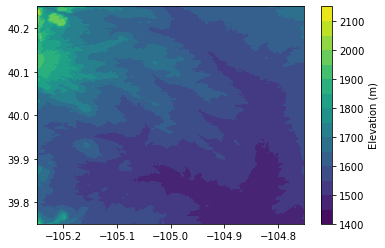

In [11]:
import matplotlib.pyplot as plt

plt.contourf(lon, lat, elevation_values_2D, 15)
plt.colorbar(label="Elevation (m)")

Complete the example by finalizing the component.

In [12]:
m.finalize()